In [51]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [52]:
import numpy as np
import pandas as pd

In [53]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [54]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [55]:
# Create the connection engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [56]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [57]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [58]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [59]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

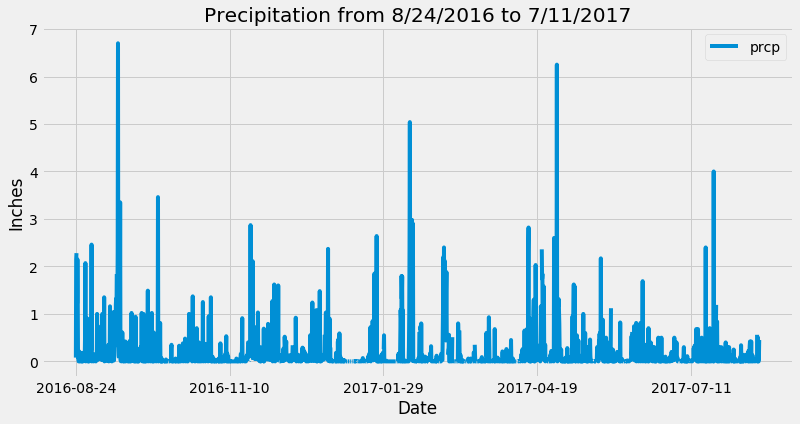

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
recent_dates = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
date_precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(date_precip, columns=['date', 'prcp'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot(figsize=(12,6))
ax.set_title("Precipitation from 8/24/2016 to 7/11/2017")
ax.set_xlabel("Date")
ax.set_ylabel("Inches")

plt.savefig('Histograms/Precipitation')

plt.show()

In [61]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [62]:
# Design a query to show how many stations are available in this dataset?
available_st = session.query(Station.station).count()
print(station_available)

9


In [63]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_st = session.query(Measurement.station, func.count(Measurement.station).label("count")).\
    group_by(Measurement.station).\
    order_by(desc('count')).all()

active_st 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
diff_temp = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs), func.count(Measurement.station).label("count")).\
    group_by(Measurement.station).\
    order_by(desc('count')).first()
diff_temp 

('USC00519281', 54.0, 85.0, 71.66378066378067, 2772)

In [65]:
# Choose the station with the highest number of temperature observations
# Query the last 12 months of temperature observation data for this station
temperature_obs = session.query(Measurement.tobs).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date > one_year_ago).\
    order_by(Measurement.date).all()

# Convert the temperature_observation into a DataFrame
temperature_obs_df = pd.DataFrame(temperature_obs)
temperature_obs_df.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


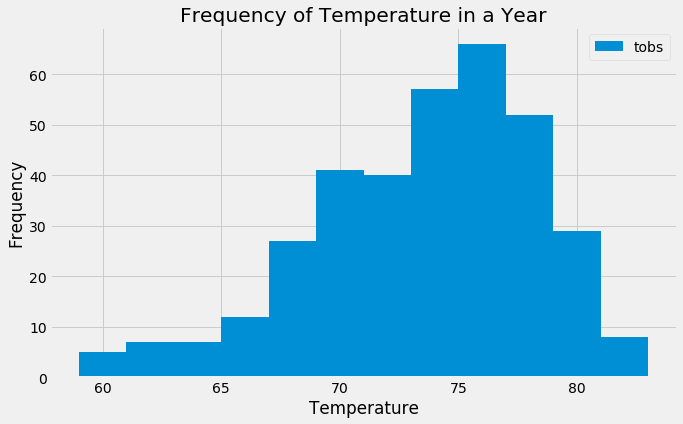

In [66]:
# Plot the results in a histogram
ax = temperature_obs_df.plot.hist(bins=12, figsize=(10,6))
ax.set_title("Frequency of Temperature in a Year")
ax.set_xlabel("Temperature")

plt.savefig('Histograms/Temperature')

plt.show()